In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_log_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df_SOAP = pd.read_csv('SOAP.csv')
df_MAGPIE = pd.read_csv('MAGPIE.csv')
df_Basic = pd.read_csv('Basic_Features.csv')
df_Class = pd.read_csv('Class.csv')
df_full = pd.concat([df_SOAP,df_MAGPIE,df_Basic,df_Class],axis=1)

In [3]:
df_full['IS_SC'].value_counts()

1    3995
0    1778
Name: IS_SC, dtype: int64

In [4]:
df_NSC=df_full[df_full['IS_SC']==0]
df_SC=df_full[df_full['IS_SC']==1]

In [5]:
df_NSC.shape

(1778, 113)

In [6]:
df_SC.shape

(3995, 113)

In [7]:
df_SC_Keep,df_SC_NOT_USED=train_test_split(df_SC,train_size=1778,random_state=22)

In [8]:
df_SC_Keep.shape

(1778, 113)

In [9]:
df_Balanced = pd.concat([df_NSC,df_SC_Keep],ignore_index=False,axis=0)

In [10]:
df_Balanced.shape

(3556, 113)

In [11]:
df_Balanced['IS_SC'].value_counts()

0    1778
1    1778
Name: IS_SC, dtype: int64

In [12]:
df_Balanced.head()

,0_SOAP,1_SOAP,2_SOAP,3_SOAP,0_MAGPIE,1_MAGPIE,2_MAGPIE,3_MAGPIE,4_MAGPIE,5_MAGPIE,...,IS_SC,Other,Heavy_fermion,Chevrel,Oxide,Cuprate,Ferrite,Carbon,OxideHeavy_fermion,Heavy_fermionChevrel
8,-4.318022,0.666479,1.756119,4.290519,7.565961,6.574117,2.883407,2.136510,-4.352759,-2.684171,...,0,1,0,0,0,0,0,0,0,0
11,-7.127369,-0.728797,0.979327,3.147847,3.796743,4.761121,8.076195,-1.229366,1.075339,-2.080735,...,0,1,0,0,0,0,0,0,0,0
18,-5.351930,0.175732,1.899704,3.546542,8.036086,5.853591,3.388295,1.715503,-4.897682,-1.963486,...,0,1,0,0,0,0,0,0,0,0
28,-5.129325,-0.477014,1.247165,1.955806,2.347327,-3.564296,1.956238,0.240303,-4.969015,-0.588075,...,0,1,0,0,0,0,0,0,0,0
29,-9.172182,-1.171112,0.760307,5.324838,1.199149,3.835899,-2.445091,-5.562431,2.247517,0.525324,...,0,0,1,0,0,0,0,0,0,0


In [13]:
MAG_cols = [col for col in df_Balanced if col.endswith('MAGPIE')]
df_MAGPIE = df_Balanced[MAG_cols].copy()
SOAP_cols = [col for col in df_Balanced if col.endswith('SOAP')]
df_SOAP = df_Balanced[SOAP_cols].copy()
features = pd.concat([df_SOAP,df_MAGPIE],axis=1)
targets = df_Balanced['IS_SC']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

In [15]:
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [16]:
RF_Pred = clf.predict(X_test)

In [17]:
clf.score(X_test,y_test)

0.7626404494382022

In [18]:
accuracy_score(RF_Pred,y_test)

0.7626404494382022

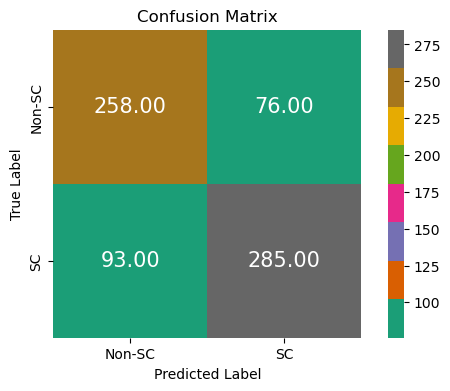

In [26]:
cm= confusion_matrix(y_test,RF_Pred)
tcn=['Non-SC','SC']
# Create pandas dataframe
#TODO
SV_cm_df = pd.DataFrame(cm, columns = tcn)
SV_cm_df.insert(0,'True Label',tcn)
SV_cm_df.set_index("True Label", inplace=True)


# Create heatmap
#TODO
plt.figure(figsize=(7,4))
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(SV_cm_df, cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15},cmap='Dark2')
plt.xlabel("Predicted Label")
plt.title('Confusion Matrix')
plt.savefig('CM_SC.png',dpi=600)
plt.show()

In [24]:
len(RF_Pred)

712